#Install and Import Required Modules

In [1]:
#Download required modules
!pip install yfinance
!pip install pyomo
!pip install idaes-pse --pre
!idaes get-extensions --to ./bin

Getting files...
Done
-----------------------------------------------------------------
IDAES Extensions Build Versions
Solvers:  v3.4.2 20240811 ubuntu2204-x86_64
Library:  v3.4.2 20240811 ubuntu2204-x86_64



In [2]:
#Import required modules
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shutil
import sys
import os
from pylab import *
from pyomo.environ import *

#Downloading Required Historical data using Yfinance

In [3]:
# Define sector tickers
sectors = {
    'technology': ['AAPL', 'MSFT', 'GOOGL', 'IBM', 'INTC', 'CSCO', 'ORCL', 'ADBE', 'NVDA', 'TXN'],
    'consumer_discretionary': ['AMZN', 'DIS', 'NKE', 'SBUX', 'MCD', 'HD', 'CMCSA', 'TGT', 'F', 'TM'],
    'industrials': ['BA', 'ITW', 'GE', 'HON', 'UPS', 'MMM', 'GD', 'LMT', 'EMR', 'UNP']
}

# Date ranges
start_train = "2017-01-01"
end_train = "2022-12-31"
start_eval = "2023-01-01"
end_eval = "2023-12-31"

# Containers for data
train_data = {}
evaluation_data = {}

In [4]:
# Download historical stock data for all tickers across sectors
for sector, tickers in sectors.items():
    for ticker in tickers:
        print(f"Downloading data for {ticker}...")
        df = yf.download(ticker, start=start_train, end=end_eval, auto_adjust=False)

        # Normalize column names in case of MultiIndex format
        if isinstance(df.columns, pd.MultiIndex):
            df.columns = [col[0] if isinstance(col, tuple) else col for col in df.columns]

        # Tag each record with its corresponding ticker symbol
        df['Ticker'] = ticker

        # Split data into training and evaluation sets based on date ranges
        train_data[ticker] = df.loc[start_train:end_train]
        evaluation_data[ticker] = df.loc[start_eval:end_eval]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


In [5]:
print("\nSample train data for NVDA:")
print(train_data['NVDA'].head())

print("\nSample evaluation data for NVDA:")
print(evaluation_data['NVDA'].head())


Sample train data for NVDA:
            Adj Close    Close     High      Low     Open      Volume Ticker
Date                                                                        
2017-01-03   2.512663  2.55025  2.65925  2.48450  2.61000  1501996000   NVDA
2017-01-04   2.571286  2.60975  2.63750  2.53825  2.58500  1199220000   NVDA
2017-01-05   2.506013  2.54350  2.64550  2.52625  2.61325   984296000   NVDA
2017-01-06   2.539511  2.57750  2.60625  2.53000  2.57125   822856000   NVDA
2017-01-09   2.642471  2.68200  2.70000  2.58750  2.58750   916248000   NVDA

Sample evaluation data for NVDA:
            Adj Close   Close    High     Low    Open     Volume Ticker
Date                                                                   
2023-01-03  14.303280  14.315  14.996  14.096  14.851  401277000   NVDA
2023-01-04  14.736923  14.749  14.853  14.241  14.567  431324000   NVDA
2023-01-05  14.253322  14.265  14.564  14.148  14.491  389168000   NVDA
2023-01-06  14.846836  14.859  15.010 

#Exploratory Data Analysis (EDA)

##Time-Series Plot for each sector

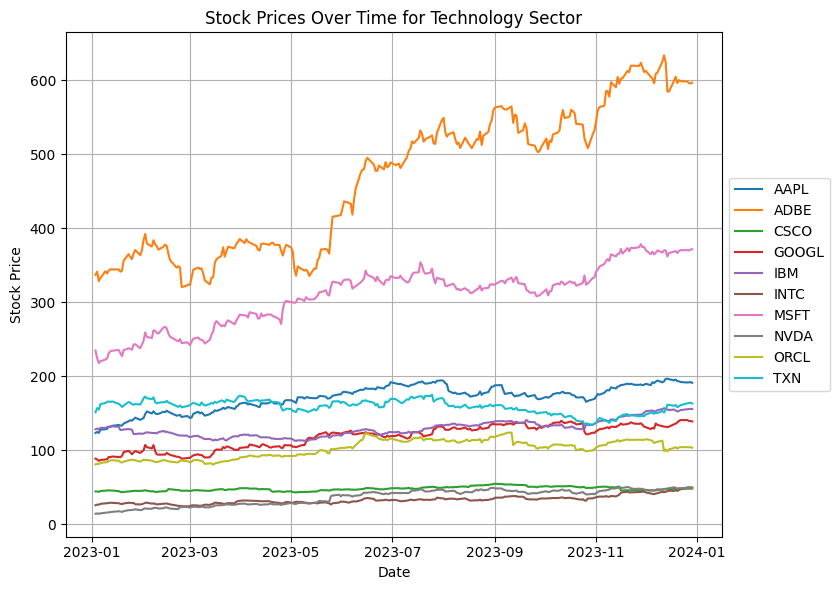

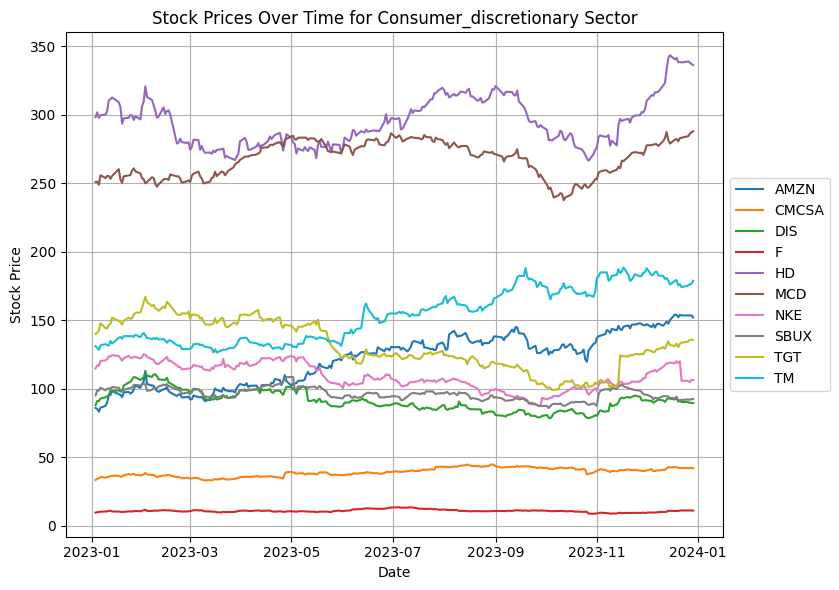

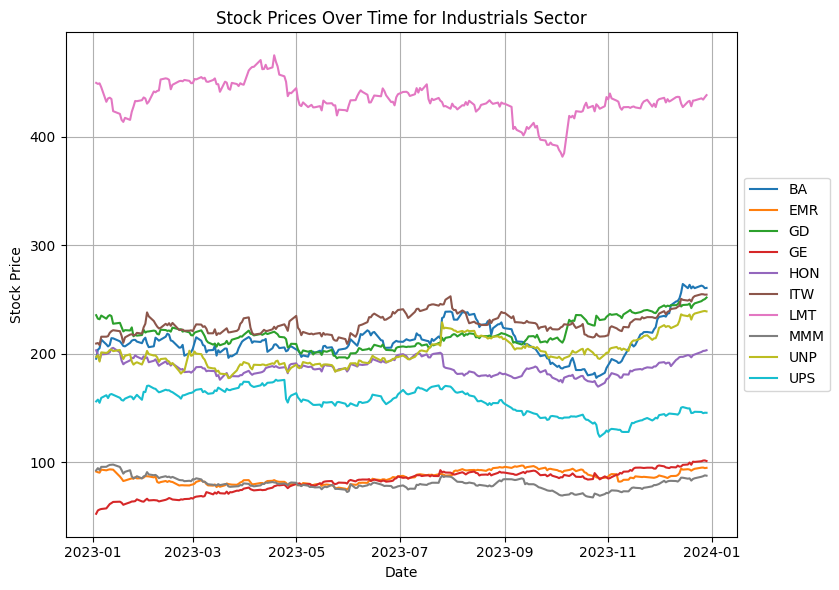

In [7]:
# Restructure evaluation data by sector for time series visualization
sector_data = {}

for sector, tickers in sectors.items():
    frames = []
    for ticker in tickers:
        df = evaluation_data[ticker].copy()
        df = df[['Adj Close']].rename(columns={'Adj Close': 'adjclose'})
        df['ticker'] = ticker
        frames.append(df)
    sector_data[sector] = pd.concat(frames)

# Plot adjusted closing prices for each stock within its sector
for sector, data in sector_data.items():
    plt.figure(figsize=(10, 6))
    plt.title(f'Stock Prices Over Time for {sector.capitalize()} Sector')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')

    # Plot each ticker as a separate line for clarity
    for ticker, stock_data in data.groupby('ticker'):
        plt.plot(stock_data.index, stock_data['adjclose'], label=ticker)

    # Organized legend and layout for readability
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.grid(True)
    plt.tight_layout(rect=[0, 0, 0.85, 1])
    plt.show()


**Technology Sector**
* ADBE and MSFT dominate visually due to high share prices
* NVDA appears flat, even though we now know it had one of the strongest growth trajectories
* IBM, INTC, and ORCL appear minor due to lower prices

**Consumer Discretionary Sector**
* Stocks like HD and MCD stand out due to higher base price
* F (Ford) and TM (Toyota) seem nearly flat — though they had reasonable relative gains
* Differences in company stock price policies (splits vs. no splits) create misleading comparisons

**Industrials Sector**
* The graph looks more balanced because most industrial stocks have prices in a similar range
* LMT and UNP look stronger due to higher share prices
* GE and BA are visually suppressed despite real volatility and decline

**NOTE:**
The above graph is not normalized meaning it plots the absolute stock prices directly. So companies with **higher share prices appear dominant** and companies with **lower share prices appear flat or insignificant**.

The above chart can mislead viewers into thinking:
* Some stocks didn’t grow much (when they did)
* Some stocks dominated performance (when their price was just higher to begin with)

##Plotting normalized date to visualize Growth between sectors

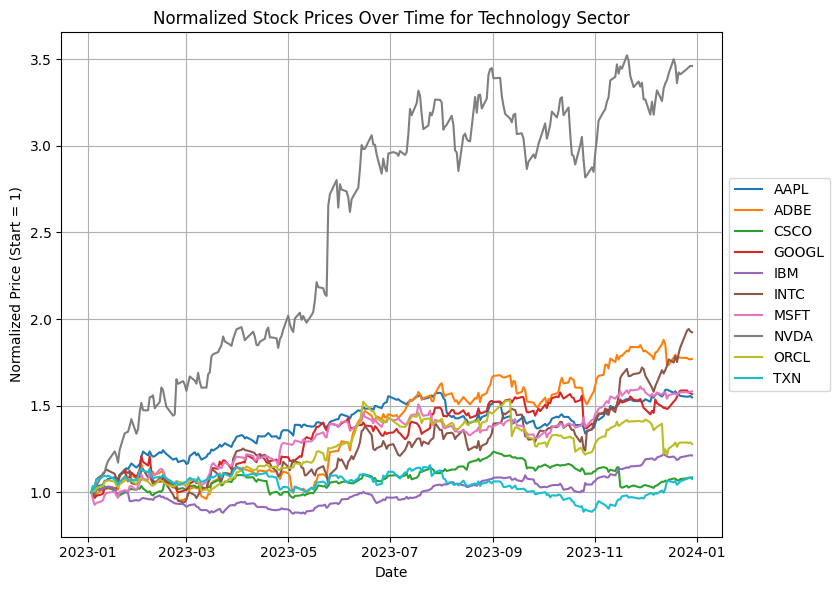

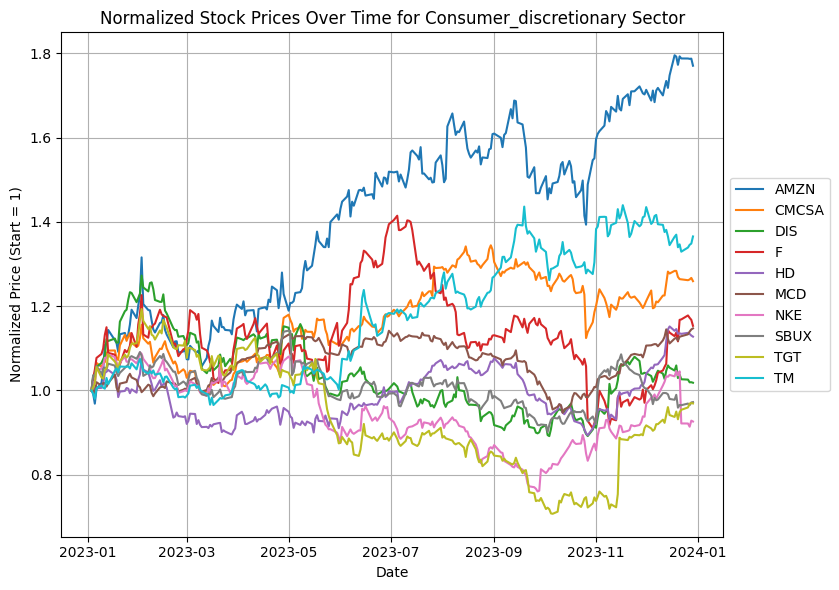

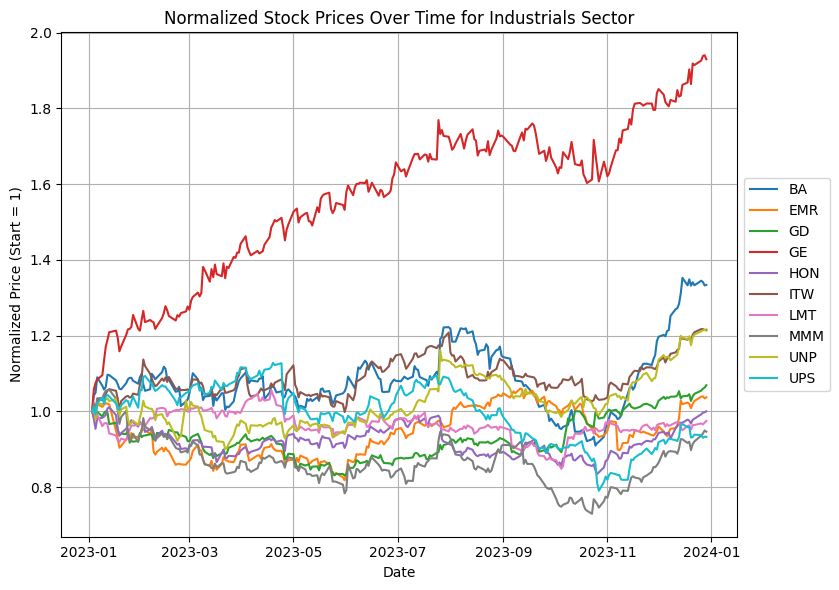

In [8]:
# Plot normalized adjusted close prices to compare relative performance within each sector
for sector, data in sector_data.items():
    plt.figure(figsize=(10, 6))
    plt.title(f'Normalized Stock Prices Over Time for {sector.capitalize()} Sector')
    plt.xlabel('Date')
    plt.ylabel('Normalized Price (Base = 1)')

    # Normalize each ticker's price to its value at the start of the evaluation period
    for ticker, stock_data in data.groupby('ticker'):
        stock_data = stock_data.sort_index()
        base_price = stock_data['adjclose'].iloc[0]
        if base_price == 0 or pd.isna(base_price):
            continue  # skip tickers with invalid starting prices
        normalized_price = stock_data['adjclose'] / base_price
        plt.plot(stock_data.index, normalized_price, label=ticker)

    # Add legend and grid for readability
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.grid(True)
    plt.tight_layout(rect=[0, 0, 0.85, 1])
    plt.show()


**Technology Sector**
* NVDA dominates with a nearly 13× growth from 2017 to its peak in late 2021.
* ADBE, MSFT, and AAPL also show impressive compounding (~4–7× growth).
* The sharp peak and decline around 2022 highlight the tech rally and subsequent correction likely due to rate hikes and overvaluation concerns.
* Tech clearly outperformed other sectors in terms of relative growth.

**Consumer Discretionary Sector**
* AMZN and TGT show 4–5× growth, leading the sector, driven by e-commerce and home improvement booms during COVID.
* Most companies grew 2–3×, while F (Ford) struggled, only recovering near baseline levels.
* This sector shows strong COVID recovery, then a softening — consistent with inflationary pressure on consumer spending.

**Industrials Sector**
* Much more stable and compressed growth — most companies range between 1× to 2.5×.
* GE underperforms dramatically, with its normalized price dropping below 0.5× (a long-term decline).
* LMT, UNP, and ITW are sector leaders, showing consistent long-term growth with less volatility than tech.
* COVID's dip is visible across the board, with BA showing major disruption.


# Momentum Trading for Stock Selection

##Function for momentum trading

In [9]:
# Define momentum trading strategy using moving average crossovers
def calculate_momentum_strategy_from_yfinance(df, ma_short=8, ma_long=21):
    df = df.copy()
    df = df[['Adj Close']].rename(columns={'Adj Close': 'Close'})  # Standardize column name
    df.dropna(inplace=True)
    df.reset_index(inplace=True)  # Ensure 'Date' column exists

    # Add a sequential time variable for plotting (not essential for strategy)
    df['Day'] = np.arange(1, len(df) + 1)

    # Compute short and long moving averages (shifted to avoid lookahead bias)
    df[f'{ma_short}-day'] = df['Close'].rolling(ma_short).mean().shift()
    df[f'{ma_long}-day'] = df['Close'].rolling(ma_long).mean().shift()

    # Remove rows where moving averages are not computable
    df.dropna(inplace=True)

    # Define investment signal: 1 if short MA > long MA, else 0
    df['invested'] = np.where(df[f'{ma_short}-day'] > df[f'{ma_long}-day'], 1, 0)

    # Calculate daily returns and strategy returns
    df['logClose'] = np.log(df['Close'])
    df['return'] = df['logClose'].diff().fillna(0)
    df['system_return'] = df['invested'] * df['return']

    # Compute cumulative returns of the strategy
    df['cumulative_return'] = np.exp(df['system_return'].cumsum()) - 1

    return df

## Graph after momentum trading

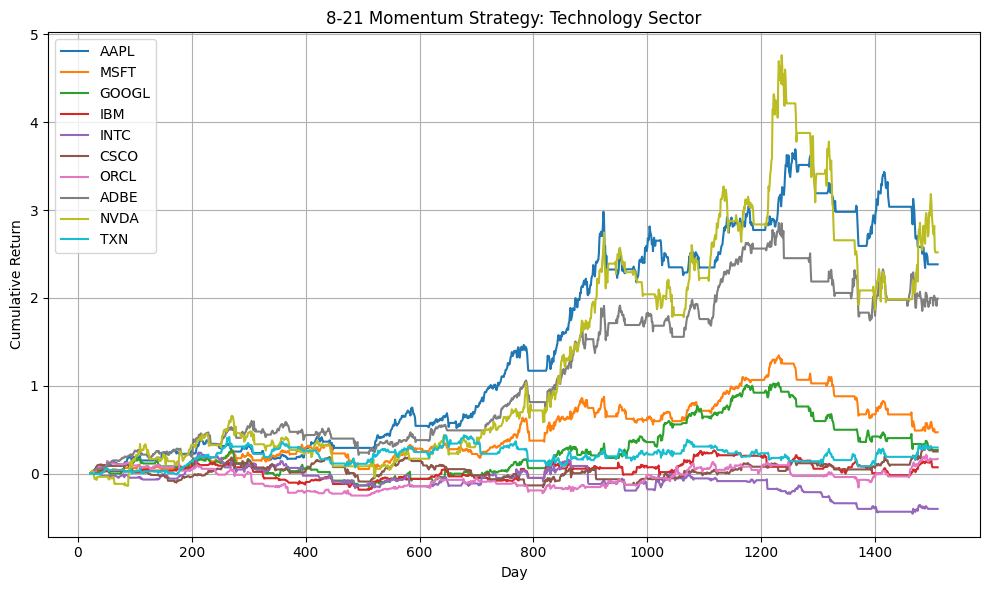

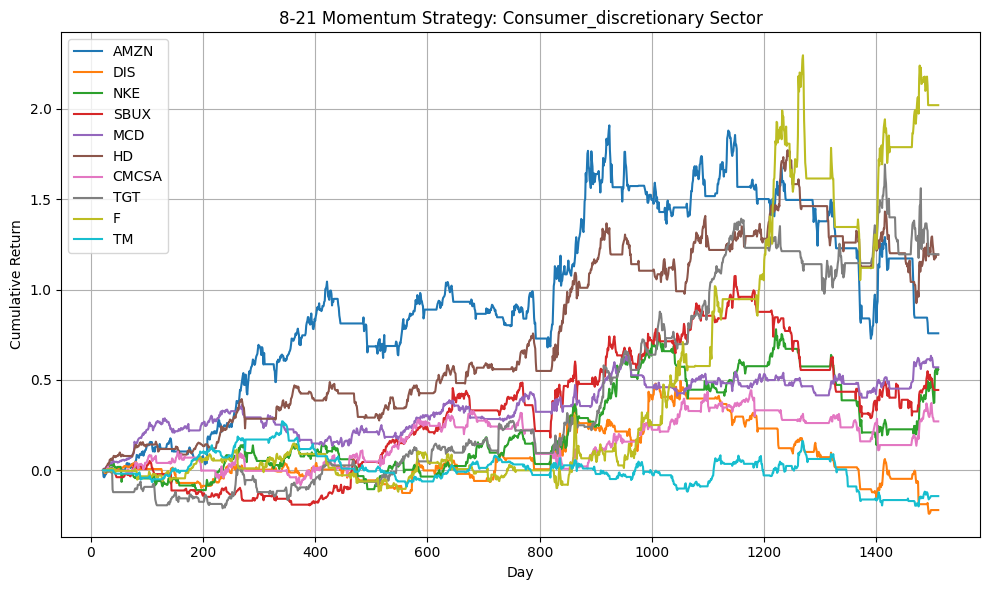

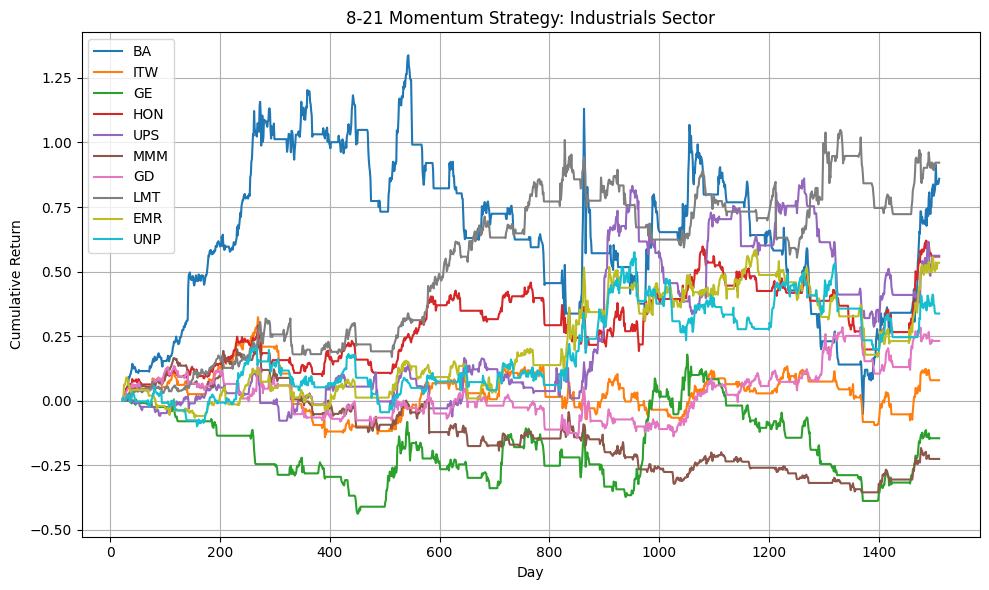

In [10]:
# Define short and long window lengths for moving average crossover strategy
ma_short = 8
ma_long = 21

# Evaluate momentum strategy for each stock in all sectors
for sector_name, ticker_list in sectors.items():
    plt.figure(figsize=(10, 6))
    plt.title(f'{ma_short}-{ma_long} Momentum Strategy: {sector_name.capitalize()} Sector')
    plt.xlabel('Day')
    plt.ylabel('Cumulative Return')

    for ticker in ticker_list:
        df = train_data.get(ticker)
        if df is not None and not df.empty:
            # Apply momentum strategy to each stock's training data
            result = calculate_momentum_strategy_from_yfinance(df, ma_short, ma_long)
            if not result.empty:
                plt.plot(result['Day'], result['cumulative_return'], label=ticker)

    # Visualize performance across stocks within the sector
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


##Cumulative return after strategy

In [11]:
# Store cumulative returns by sector
all_cumulative_returns = {}

print("Cumulative returns for all stocks:")
print("Sector                 Stock  Cumulative Return")

# Evaluate performance of each stock using the momentum strategy
for sector_name, ticker_list in sectors.items():
    all_cumulative_returns[sector_name] = {}

    for ticker in ticker_list:
        df = train_data.get(ticker)
        if df is not None and not df.empty:
            # Apply momentum strategy to the stock's historical data
            stock = calculate_momentum_strategy_from_yfinance(df, ma_short, ma_long)
            if not stock.empty:
                # Extract final cumulative return from strategy
                final_return = stock['cumulative_return'].iloc[-1]
                all_cumulative_returns[sector_name][ticker] = final_return

    # Rank stocks in the sector by cumulative return
    sorted_returns = sorted(
        all_cumulative_returns[sector_name].items(),
        key=lambda x: x[1],
        reverse=True
    )

    # Display sorted returns for each sector
    for ticker, return_value in sorted_returns:
        display_sector = sector_name.replace('_', ' ') if sector_name == 'consumer_discretionary' else sector_name
        print(f"{display_sector:<24}{ticker:<6}{return_value:.6f}")


Cumulative returns for all stocks:
Sector                 Stock  Cumulative Return
technology              NVDA  2.518456
technology              AAPL  2.381797
technology              ADBE  1.991360
technology              MSFT  0.470023
technology              TXN   0.296510
technology              GOOGL 0.267650
technology              CSCO  0.250838
technology              ORCL  0.167163
technology              IBM   0.071217
technology              INTC  -0.402257
consumer discretionary  F     2.020153
consumer discretionary  TGT   1.195637
consumer discretionary  HD    1.192939
consumer discretionary  AMZN  0.758219
consumer discretionary  MCD   0.569982
consumer discretionary  NKE   0.558835
consumer discretionary  SBUX  0.444740
consumer discretionary  CMCSA 0.270938
consumer discretionary  TM    -0.142303
consumer discretionary  DIS   -0.219493
industrials             LMT   0.921828
industrials             BA    0.859446
industrials             UPS   0.561343
industrials      

In [12]:
# Extract top-performing tickers based on momentum strategy

top_tickers = []

print("Top 3 performing stocks:")
print("Rank  Sector                 Stock  Cumulative Return")
rank = 1

# Select top 3 stocks from each sector by cumulative return
for sector_name, returns in all_cumulative_returns.items():
    top_performers = sorted(returns.items(), key=lambda x: x[1], reverse=True)[:3]

    for stock, return_value in top_performers:
        display_sector = sector_name.replace('_', ' ') if sector_name == 'consumer_discretionary' else sector_name
        print(f"{rank:<5}{display_sector:<24}{stock:<6}{return_value:.6f}")
        rank += 1
        top_tickers.append(stock)

# Select the top 9 tickers across all sectors for further analysis
top_tickers = top_tickers[:9]

print("\nTop 9 tickers from all sectors:", top_tickers)


Top 3 performing stocks:
Rank  Sector                 Stock  Cumulative Return
1    technology              NVDA  2.518456
2    technology              AAPL  2.381797
3    technology              ADBE  1.991360
4    consumer discretionary  F     2.020153
5    consumer discretionary  TGT   1.195637
6    consumer discretionary  HD    1.192939
7    industrials             LMT   0.921828
8    industrials             BA    0.859446
9    industrials             UPS   0.561343

Top 9 tickers from all sectors: ['NVDA', 'AAPL', 'ADBE', 'F', 'TGT', 'HD', 'LMT', 'BA', 'UPS']


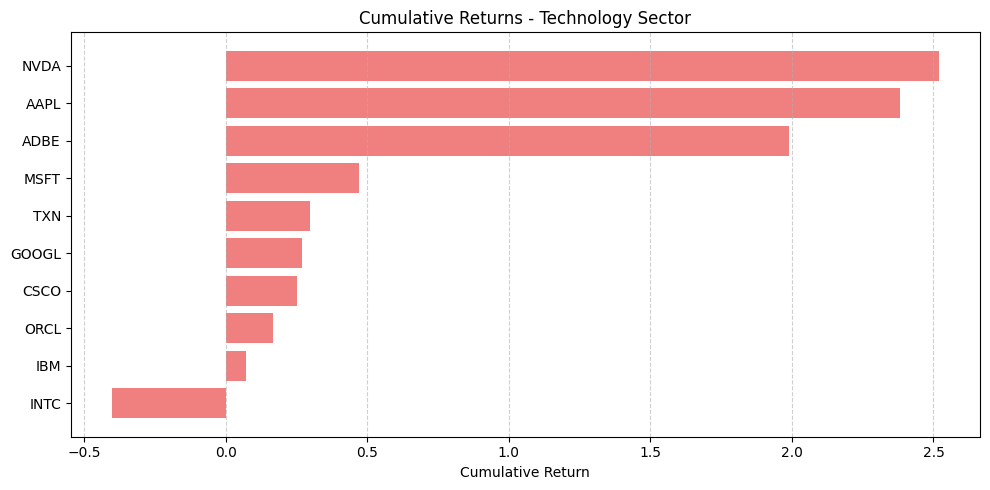

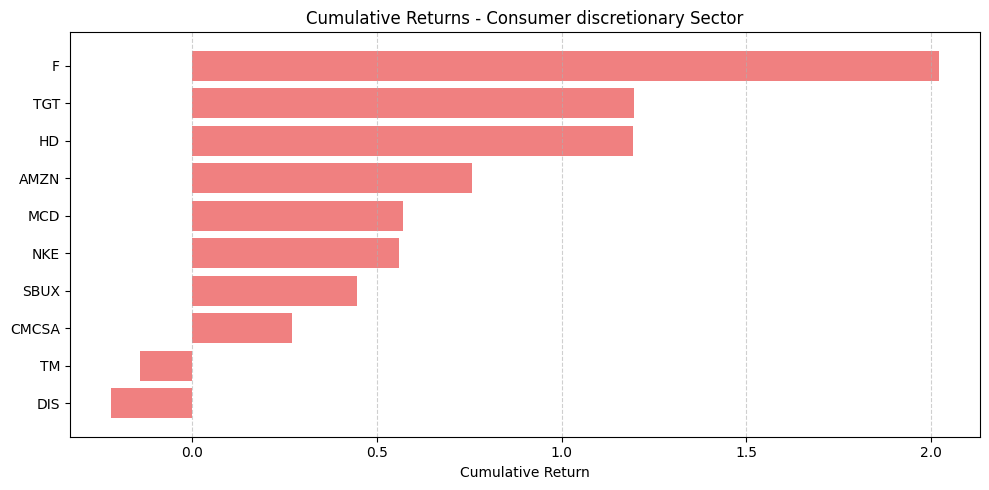

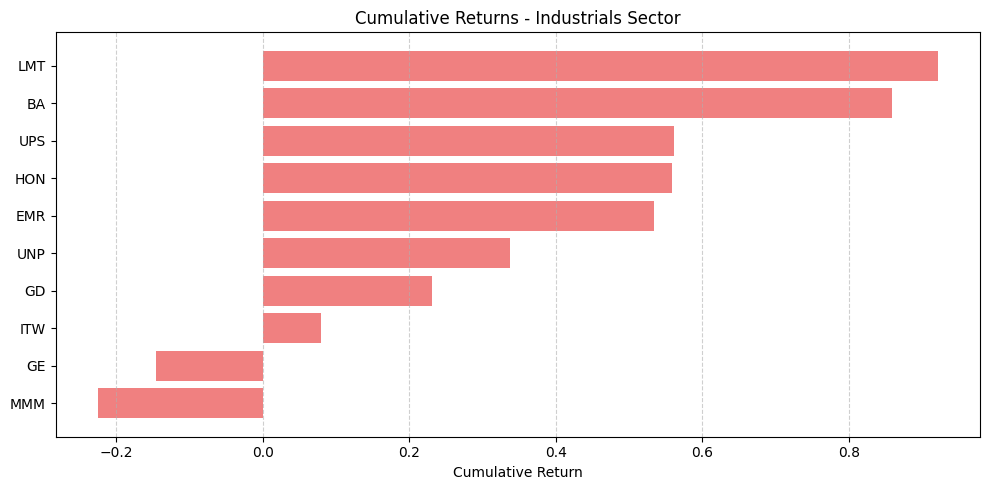

In [13]:
# Plot horizontal bar charts showing cumulative returns for each sector

for sector, tickers_returns in all_cumulative_returns.items():
    # Rank tickers within sector by cumulative return
    sorted_returns = sorted(tickers_returns.items(), key=lambda x: x[1], reverse=True)

    tickers = [ticker for ticker, _ in sorted_returns]
    returns = [ret for _, ret in sorted_returns]

    plt.figure(figsize=(10, 5))
    plt.barh(tickers, returns, color='lightcoral')
    plt.xlabel('Cumulative Return')
    plt.title(f'Cumulative Returns - {sector.replace("_", " ").capitalize()} Sector')
    plt.gca().invert_yaxis()  # Highest returns at the top
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


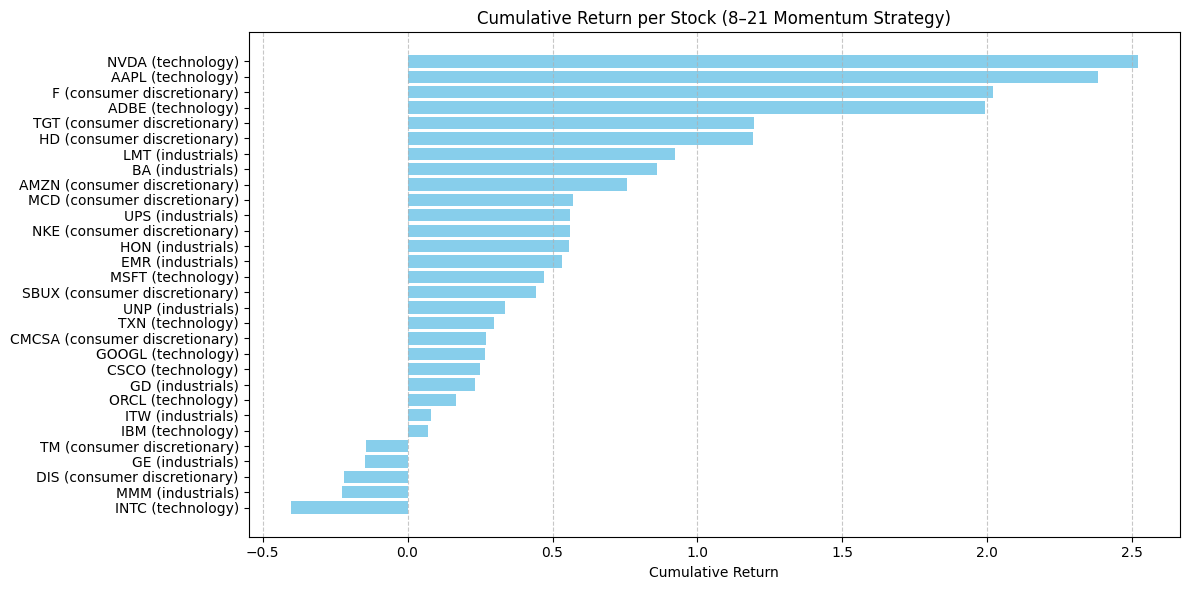

In [14]:
# Flatten sector-wise cumulative returns into a list of (sector, ticker, return) tuples
records = []
for sector, tickers in all_cumulative_returns.items():
    for ticker, cum_return in tickers.items():
        display_sector = sector.replace('_', ' ') if sector == 'consumer_discretionary' else sector
        records.append((display_sector, ticker, cum_return))

# Sort the flattened records by cumulative return in descending order
records_sorted = sorted(records, key=lambda x: x[2], reverse=True)

# Generate x-axis labels and y-axis values for the bar chart
tickers = [f"{ticker} ({sector})" for sector, ticker, _ in records_sorted]
returns = [ret for _, _, ret in records_sorted]

# Plot a horizontal bar chart showing overall cumulative returns
plt.figure(figsize=(12, 6))
plt.barh(tickers, returns, color='skyblue')
plt.xlabel('Cumulative Return')
plt.title('Cumulative Return per Stock (8–21 Momentum Strategy)')
plt.gca().invert_yaxis()  # Place highest returns at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


##Observation

1️) Technology Sector
* Strongest overall performance across all three sectors.
* NVDA, AAPL, and ADBE had the highest cumulative returns — more than doubled the initial investment using this simple strategy.
* Stocks like MSFT and GOOGL also showed solid trends, though slightly more volatile.
* Some tech names like IBM and INTC underperformed — showing that not all large tech stocks exhibit persistent momentum.

2️) Consumer Discretionary Sector
* Mixed performance.
* F (Ford) stood out — a surprising top performer driven by cyclical rebound and possibly EV optimism.
* TGT and HD also performed well, but with more modest gains.
* Many stocks (e.g., TM, DIS) showed flat or noisy signals, leading to small or negative returns.

3️) Industrials Sector
* Generally the least responsive to the strategy.
* Only a few like LMT, BA, and UPS posted meaningful returns.
* Many names (e.g., GE, MMM, EMR) showed sideways or declining returns, where momentum rules struggled to find a profitable trend.


#Optimization Model using Pyomo

In [15]:
# Ensure bonmin solver is installed (colab)
%%capture
if 'google.colab' in sys.modules:
    !pip install idaes-pse --pre
    !idaes get-extensions --to ./bin
    os.environ['PATH'] += ':bin'

In [16]:
# Portfolio optimization using mean-variance framework and Pyomo for MIP solving
def portfolio_optimization_from_train_data(tickers, max_risk=0.0015, risk_levels=100, solver_name='bonmin'):

    # Step 1: Compute historical return statistics
    df_prices = pd.DataFrame({ticker: train_data[ticker]['Adj Close'] for ticker in tickers}).dropna()
    df_returns = df_prices.pct_change().dropna()
    avg_return = df_returns.mean()
    cov_matrix = df_returns.cov()

    # Step 2: Define Pyomo optimization model
    m = ConcreteModel()
    m.x = Var(tickers, within=NonNegativeReals, bounds=(0, 1))  # Continuous weights
    m.y = Var(tickers, within=Binary)  # Binary selection variable

    # Objective: Maximize expected portfolio return under selection constraint
    m.objective = Objective(expr=sum([m.x[t] * m.y[t] * avg_return[t] for t in tickers]), sense=maximize)

    # Constraint: Total allocation must sum to 1 (fully invested portfolio)
    m.sum_weights = Constraint(expr=sum([m.x[t] for t in tickers]) == 1)

    # Constraint: Limit number of selected assets (sparsity control)
    m.num_assets = Constraint(expr=sum([m.y[t] for t in tickers]) == 3)

    # Risk function: Portfolio variance computed from covariance matrix
    def calc_risk(m):
        return sum([m.x[i] * cov_matrix.loc[i, j] * m.x[j] for i in tickers for j in tickers])

    # Step 3: Solve optimization problem for a range of risk levels
    risk_limits = np.linspace(0, max_risk, risk_levels)
    param_analysis = {}
    returns = {}
    num_stocks_list = []

    for r in risk_limits:
        m.risk_constraint = Constraint(expr=calc_risk(m) <= r)
        try:
            solver = SolverFactory(solver_name)
            result = solver.solve(m, tee=False)

            if (result.solver.status == SolverStatus.ok) and (result.solver.termination_condition == TerminationCondition.optimal):
                weights = [value(m.x[t]) for t in tickers]
                param_analysis[r] = weights
                returns[r] = value(m.objective)
                num_selected = sum([1 for t in tickers if value(m.y[t]) > 0.01])
                num_stocks_list.append(num_selected)
            else:
                print(f"Infeasible at risk level {r:.5f}")
        except Exception as e:
            print(f"Infeasible at risk level {r:.5f} due to error: {e}")
        finally:
            del m.risk_constraint

    # Step 4: Structure optimization output
    df_param = pd.DataFrame(param_analysis, index=tickers).T

    # Step 5: Plot stock allocation, frontier, and diversity metrics

    # Allocation across risk levels
    plt.figure(figsize=(10, 6))
    for ticker in tickers:
        if (df_param[ticker] > 0).any():
            plt.plot(df_param.index, df_param[ticker], label=ticker)
    plt.title('Optimal Stock Allocation for Different Risk Levels')
    plt.xlabel('Risk Level')
    plt.ylabel('Proportion')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.tight_layout()
    plt.show()

    # Efficient frontier (risk vs. expected return)
    plt.figure(figsize=(8, 5))
    plt.plot(list(returns.keys()), list(returns.values()), '-.')
    plt.title('The Efficient Frontier')
    plt.xlabel('Risk')
    plt.ylabel('Return')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Number of assets in portfolio as risk tolerance changes
    plt.figure(figsize=(8, 4))
    plt.plot(list(returns.keys()), num_stocks_list, marker='o')
    plt.title('Number of Stocks in Portfolio')
    plt.xlabel('Risk Level')
    plt.ylabel('Number of Stocks')
    plt.yticks(np.arange(min(num_stocks_list), max(num_stocks_list) + 1))
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Step 6: Display optimal portfolio weights for highest risk level
    print("\n✅ Optimal Portfolio Allocation at Max Risk Level:")
    print(df_param.iloc[-1])

    return df_param

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Infeasible at risk level 0.00000


  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Infeasible at risk level 0.00002


  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Infeasible at risk level 0.00003


  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Infeasible at risk level 0.00005


  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Infeasible at risk level 0.00006


  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Infeasible at risk level 0.00008


  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Infeasible at risk level 0.00009


  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Infeasible at risk level 0.00011


  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Infeasible at risk level 0.00012


  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Infeasible at risk level 0.00014


  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Infeasible at risk level 0.00015


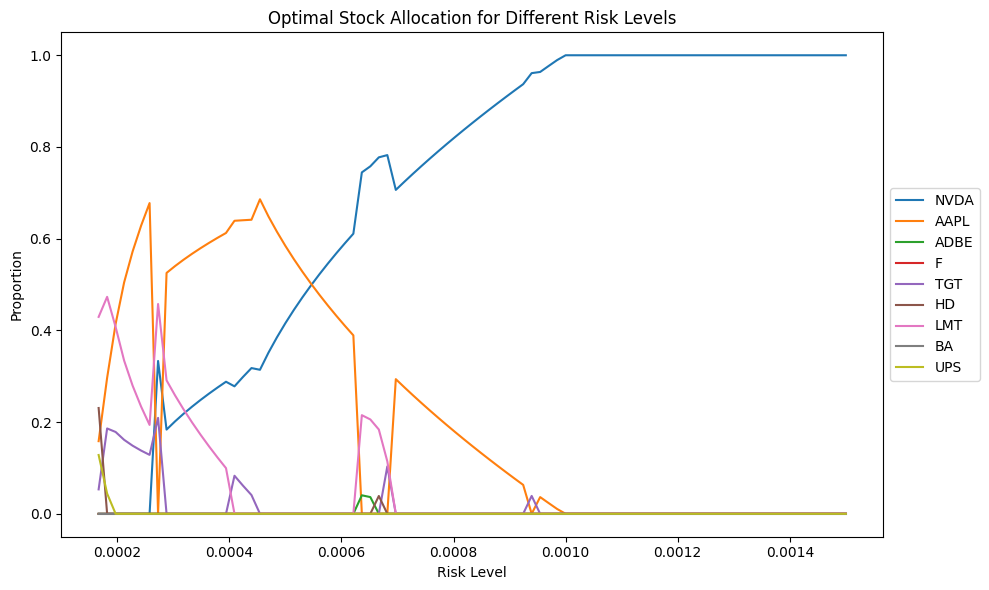

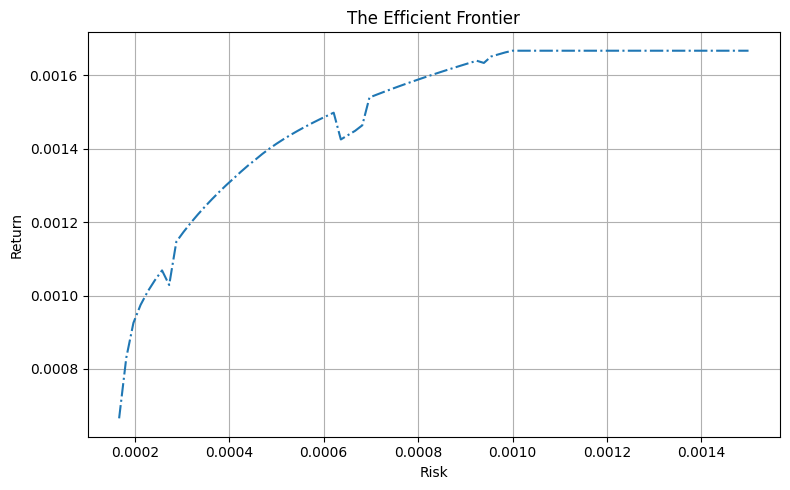

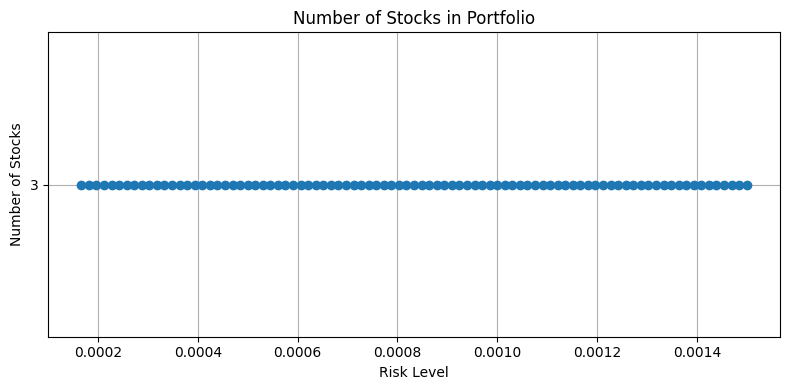


✅ Optimal Portfolio Allocation at Max Risk Level:
NVDA    1.000000e+00
AAPL    3.402006e-08
ADBE    1.324394e-08
F       0.000000e+00
TGT     0.000000e+00
HD      0.000000e+00
LMT     0.000000e+00
BA      0.000000e+00
UPS     0.000000e+00
Name: 0.0015, dtype: float64


In [17]:
#Calling the param_analysis function with risk of 0.0015
param_analysis = portfolio_optimization_from_train_data(
    tickers=top_tickers,
    max_risk=0.0015,
    risk_levels=100,
    solver_name='bonmin'
)

1. Infeasibility Warnings at Low Risk Levels:
The warnings indicate that for extremely low risk levels (e.g., 0.00000 to ~0.00015), the optimization problem is infeasible. This means that under such stringent risk constraints, it's not possible to construct a portfolio with the required 3-stock allocation while still satisfying the expected return maximization objective.

2. Portfolio Stabilization at Higher Risk:
As the allowed risk increases, the model starts to find feasible solutions. Eventually, it converges to a stable allocation where NVDA dominates the portfolio, receiving nearly 100% of the weight at the highest risk level (max_risk = 0.0015).

3. Efficient Frontier:
The efficient frontier plot shows a clear risk-return tradeoff. As risk tolerance increases, so does the expected return—until it flattens out, suggesting diminishing returns at higher risk levels.

4. Number of Stocks in Portfolio:
The number of selected stocks remains constant at 3 (due to the enforced constraint), even though actual weight contributions may become negligible for some tickers.

5. Key Allocation Insight:
The final allocation reveals a strong preference for NVDA, indicating it provides the highest return per unit of risk among the candidates at the maximum risk threshold.


✅ Optimal Portfolio Allocation at Risk ≈ 0.00061
NVDA    0.589955
AAPL    0.410045
Name: 0.0006060606060606061, dtype: float64


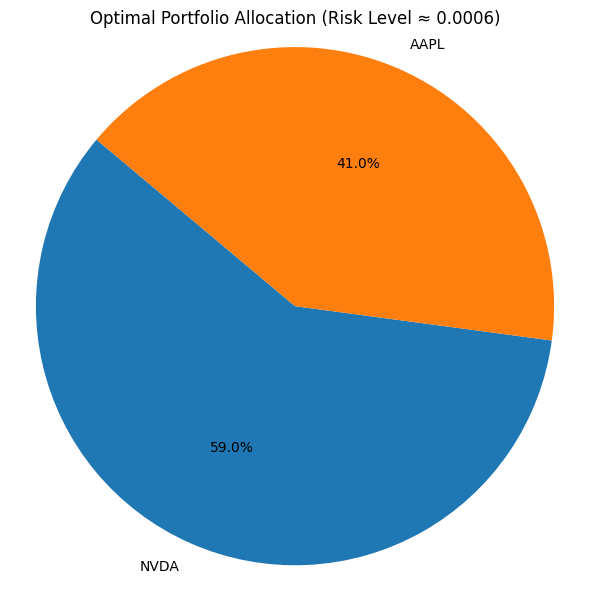

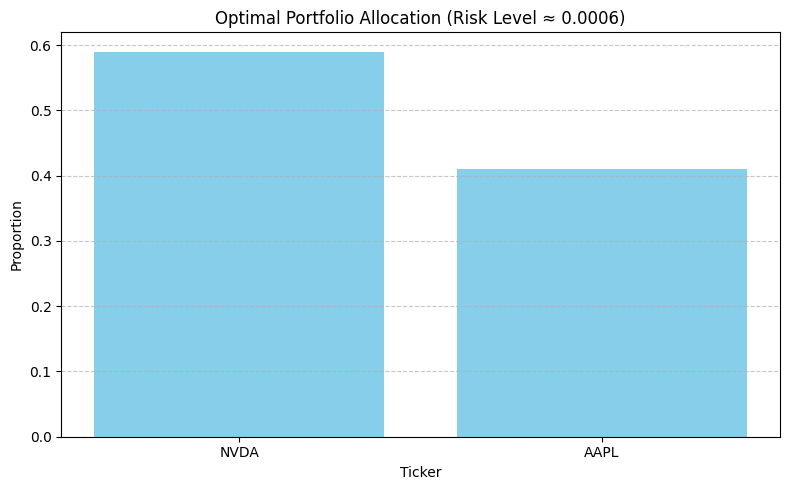

In [18]:
# Select portfolio corresponding to a specific target risk level and visualize its composition

# Identify the risk level closest to the target
target_risk = 0.0006
closest_risk_level = param_analysis.index[np.abs(param_analysis.index - target_risk).argmin()]

# Extract the portfolio allocation at the selected risk level
portfolio_proportions = param_analysis.loc[closest_risk_level]

# Filter out allocations below 1% to focus on meaningful contributors
portfolio_cleaned = portfolio_proportions[portfolio_proportions > 0.01]

# Display selected portfolio
print(f"\nOptimal Portfolio Allocation at Risk ≈ {closest_risk_level:.5f}")
print(portfolio_cleaned)

# Pie chart to visualize proportional distribution
plt.figure(figsize=(6, 6))
plt.pie(portfolio_cleaned, labels=portfolio_cleaned.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Optimal Portfolio Allocation (Risk Level ≈ {closest_risk_level:.4f})')
plt.axis('equal')
plt.tight_layout()
plt.show()

# Bar chart to show exact portfolio weights
plt.figure(figsize=(8, 5))
plt.bar(portfolio_cleaned.index, portfolio_cleaned.values, color='skyblue')
plt.title(f'Optimal Portfolio Allocation (Risk Level ≈ {closest_risk_level:.4f})')
plt.xlabel('Ticker')
plt.ylabel('Proportion')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


At the target risk level of approximately 0.00061, the optimal portfolio allocation selects only two stocks: NVIDIA (NVDA) and Apple (AAPL).

**NVDA dominates the portfolio with a weight of about 59%, while AAPL holds the remaining 41%.**

This suggests that under moderate risk constraints, the model favors a highly concentrated portfolio consisting of high-growth technology stocks, particularly those with strong historical momentum and favorable risk-return characteristics.

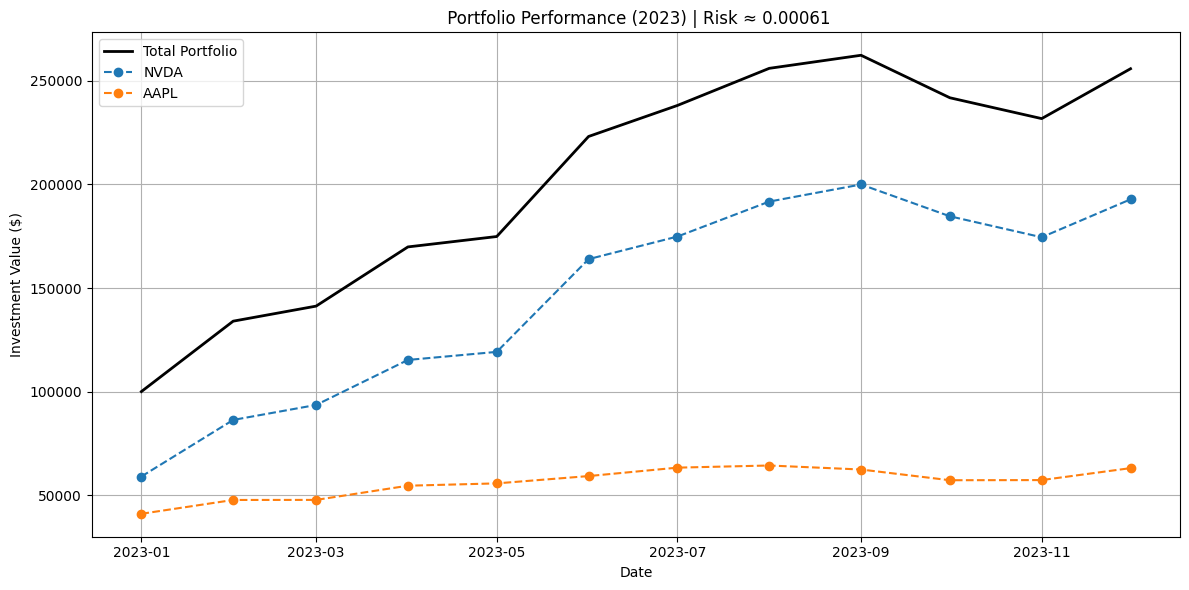


 Monthly Investment Breakdown:
                 NVDA      AAPL      Total
2023-01-01   58995.54  41004.46  100000.00
2023-02-01   86311.11  47679.52  133990.63
2023-03-01   93543.87  47712.92  141256.79
2023-04-01  115270.02  54562.37  169832.39
2023-05-01  119165.25  55685.33  174850.58
2023-06-01  163929.52  59214.82  223144.34
2023-07-01  174841.88  63282.16  238124.05
2023-08-01  191718.85  64317.91  256036.76
2023-09-01  199971.86  62379.87  262351.73
2023-10-01  184622.99  57207.34  241830.33
2023-11-01  174493.51  57279.78  231773.29
2023-12-01  192798.31  63048.89  255847.19


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Get portfolio allocation for the risk level closest to target
target_risk = 0.0006
closest_risk_level = param_analysis.index[np.abs(param_analysis.index - target_risk).argmin()]
portfolio_proportions = param_analysis.loc[closest_risk_level]
portfolio_proportions = portfolio_proportions[portfolio_proportions > 0.01]

# Define total investment capital
total_investment = 100000

# Create monthly date index for evaluation period
dates = pd.date_range(start="2023-01-01", end="2023-12-31", freq='MS')
portfolio_values = pd.DataFrame(index=dates, columns=portfolio_proportions.index)

# Extract monthly adjusted close prices for selected tickers
for ticker in portfolio_proportions.index:
    stock_df = evaluation_data[ticker].copy()
    stock_df.index = pd.to_datetime(stock_df.index)
    monthly_prices = stock_df['Adj Close'].resample('MS').first()
    portfolio_values[ticker] = monthly_prices.reindex(dates)

# Calculate initial allocation and number of shares to purchase
allocations = {ticker: total_investment * weight for ticker, weight in portfolio_proportions.items()}
shares = {ticker: allocations[ticker] / portfolio_values.iloc[0][ticker] for ticker in portfolio_proportions.index}

# Compute monthly investment values per stock
investment_df = pd.DataFrame(index=dates)
for ticker in portfolio_proportions.index:
    investment_df[ticker] = shares[ticker] * portfolio_values[ticker]

investment_df['Total'] = investment_df.sum(axis=1)

# Plot portfolio performance and stock-wise contributions
plt.figure(figsize=(12, 6))
plt.plot(investment_df.index, investment_df['Total'], label='Total Portfolio', color='black', linewidth=2)

for ticker in portfolio_proportions.index:
    plt.plot(investment_df.index, investment_df[ticker], linestyle='--', marker='o', label=ticker)

plt.title(f'Portfolio Performance Over 2023 | Risk ≈ {closest_risk_level:.5f}')
plt.xlabel('Date')
plt.ylabel('Investment Value ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print table showing monthly portfolio and individual stock values
print("\nMonthly Investment Breakdown:")
print(investment_df.round(2))


Key Insights from MPT Portfolio Performance (2023)
1. Exceptional Portfolio Growth
The portfolio started with an investment of \$100,000 and grew to \$255,847.27 by the end of December 2023 — representing a 155.85% return over the year.

2. Well-Balanced Allocation
  * The portfolio consisted of two main holdings:
      * NVDA (≈59%)
      * AAPL (≈41%)
  * These allocations were derived from the optimal proportions at the specified risk level.

3. Stock-Level Performance
  * NVDA ended the year with a value of \$192,798.45, up from an initial allocation of \$58,995.58 — a ~227% increase.
  * AAPL rose from \$41,004.41 to \$63,048.82, delivering a ~54% gain.

4. Steady Month-to-Month Growth
  * The portfolio showed consistent monthly gains with mild volatility in Q4. After slight drawdowns in October and November, it recovered strongly in December.

#Momentum Trading vs Buy and Hold strategy on S&P 500

##8-21 Momentum Trading usnig S&P 500

[*********************100%***********************]  1 of 1 completed


Investment values on the first day of each month:
               Investment
Date                     
2023-01-01  100000.000000
2023-02-01  103415.371218
2023-03-01  100197.835571
2023-04-01  103900.397549
2023-05-01  104992.686820
2023-06-01  105823.860972
2023-07-01  111704.687017
2023-08-01  114741.753159
2023-09-01  112008.546650
2023-10-01  107400.732300
2023-11-01  104307.857244
2023-12-01  109349.778314


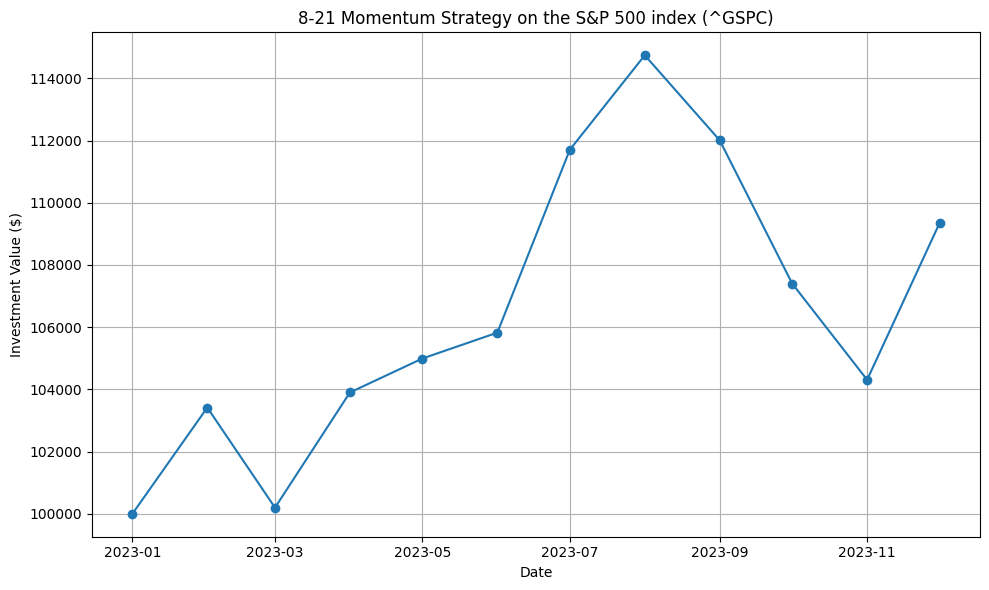

In [20]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define ticker symbol, date range, and initial capital
ticker = "^GSPC"
start_date = "2022-12-10"
end_date = "2023-12-31"
initial_investment = 100000

# Fetch S&P 500 index data using yfinance
df_sp500 = yf.download(ticker, start=start_date, end=end_date, auto_adjust=False)

# Flatten any MultiIndex columns that might be returned
if isinstance(df_sp500.columns, pd.MultiIndex):
    df_sp500.columns = [col[0] if isinstance(col, tuple) else col for col in df_sp500.columns]

# Apply 8–21 day moving average momentum strategy to price data
sp500_strategy = calculate_momentum_strategy_from_yfinance(df_sp500)

# Convert strategy output to investment value based on initial capital
sp500_strategy['Investment'] = initial_investment * (1 + sp500_strategy['cumulative_return'])

# Set Date column as index for time-based resampling
sp500_strategy['Date'] = pd.to_datetime(sp500_strategy['Date'])
sp500_strategy.set_index('Date', inplace=True)

# Get investment value on the first trading day of each month
investment_values_first_day_month = sp500_strategy[['Investment']].resample('MS').first()

# Display monthly investment values
print("Investment values on the first day of each month:")
print(investment_values_first_day_month)

# Plot investment growth over time
plt.figure(figsize=(10, 6))
plt.plot(investment_values_first_day_month.index, investment_values_first_day_month['Investment'], marker='o')
plt.title('8-21 Momentum Strategy on the S&P 500 index (^GSPC)')
plt.xlabel('Date')
plt.ylabel('Investment Value ($)')
plt.grid(True)
plt.tight_layout()
plt.show()


##Buy and Hold using S&P 500

📊 Buy-and-Hold Strategy (Monthly Values):
             Buy_and_Hold
Date                     
2022-12-01  100000.000000
2023-01-01   95829.653894
2023-02-01  103223.855811
2023-03-01   99018.429357
2023-04-01  103356.664354
2023-05-01  104443.237440
2023-06-01  105775.128241
2023-07-01  111653.246119
2023-08-01  114688.913668
2023-09-01  113161.309521
2023-10-01  107463.365386
2023-11-01  106197.120230
2023-12-01  115137.469812


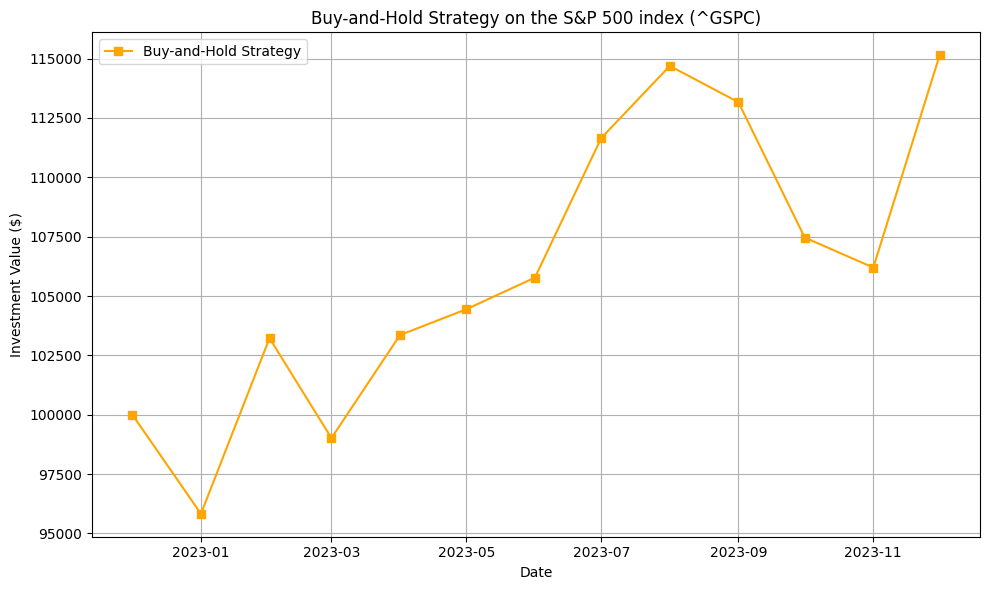

In [21]:
# Buy-and-Hold strategy based on previously downloaded S&P 500 data (df_sp500)

# Extract adjusted close prices
adj_close = df_sp500['Adj Close']

# Determine initial investment price and number of shares purchased
initial_price = adj_close.loc[adj_close.first_valid_index()]
shares = initial_investment / initial_price

# Compute daily portfolio value and resample to monthly values (first trading day)
buy_hold_value = shares * adj_close
buy_hold_monthly = buy_hold_value.resample('MS').first()
buy_hold_df = pd.DataFrame({'Buy_and_Hold': buy_hold_monthly})

# Display monthly portfolio values for buy-and-hold strategy
print("Buy-and-Hold Strategy (Monthly Values):")
print(buy_hold_df)

# Plot investment performance over time
plt.figure(figsize=(10, 6))
plt.plot(buy_hold_df.index, buy_hold_df['Buy_and_Hold'], marker='s', color='orange', label='Buy-and-Hold Strategy')
plt.title('Buy-and-Hold Strategy on the S&P 500 index (^GSPC)')
plt.xlabel('Date')
plt.ylabel('Investment Value ($)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


##Comparing Strategies

In [25]:
# Combine both strategy results into one table
comparison_df = pd.concat([
    investment_values_first_day_month.rename(columns={'Investment': 'Momentum Strategy'}),
    buy_hold_df.rename(columns={'Buy_and_Hold': 'Buy-and-Hold Strategy'})
], axis=1)

# Display the side-by-side comparison
print("\nSide-by-Side Monthly Investment Value Comparison:")
print(comparison_df)


Side-by-Side Monthly Investment Value Comparison:
            Momentum Strategy  Buy-and-Hold Strategy
Date                                                
2022-12-01                NaN          100000.000000
2023-01-01      100000.000000           95829.653894
2023-02-01      103415.371218          103223.855811
2023-03-01      100197.835571           99018.429357
2023-04-01      103900.397549          103356.664354
2023-05-01      104992.686820          104443.237440
2023-06-01      105823.860972          105775.128241
2023-07-01      111704.687017          111653.246119
2023-08-01      114741.753159          114688.913668
2023-09-01      112008.546650          113161.309521
2023-10-01      107400.732300          107463.365386
2023-11-01      104307.857244          106197.120230
2023-12-01      109349.778314          115137.469812


* The momentum strategy uses moving averages (8-day and 21-day) to determine whether to be "invested" or not.
* These moving averages are computed using rolling windows, and because of the .shift() operation used in your function, the very first few rows (including the first day) do not have enough data to calculate the averages.
* After dropping NaNs (df.dropna(inplace=True)), the earliest available date in the momentum strategy is likely after December 1, 2022.
* Therefore, when you resample monthly (resample('MS') which means "Month Start"), there's no valid value on 2022-12-01, so the result is NaN.

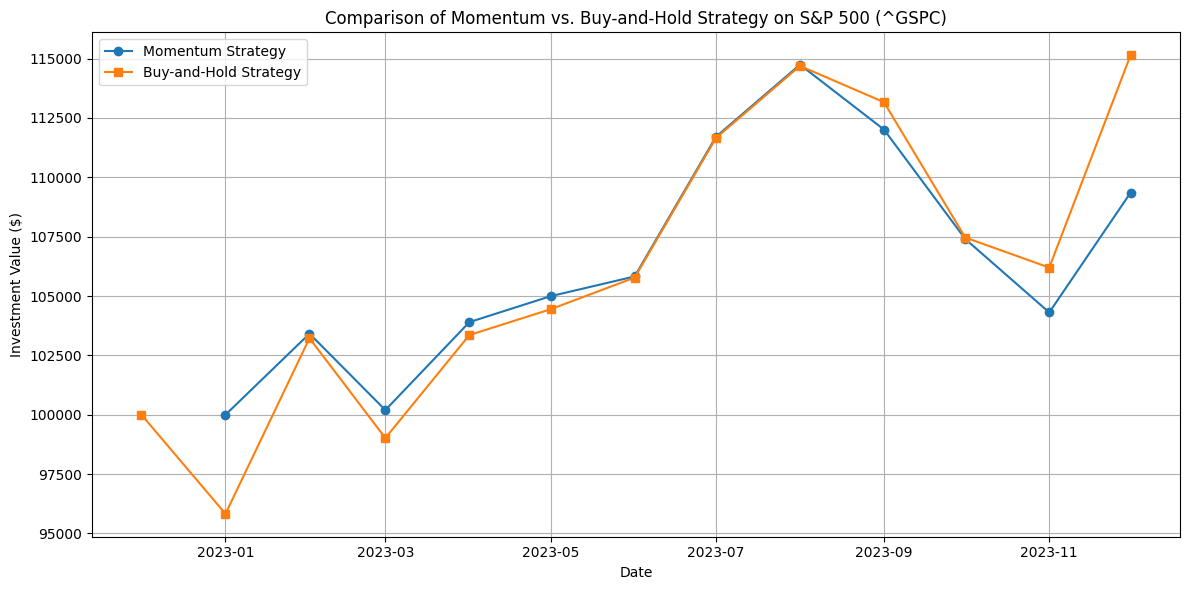

In [24]:
# Compare Momentum vs Buy-and-Hold strategy

plt.figure(figsize=(12, 6))
plt.plot(investment_values_first_day_month.index, investment_values_first_day_month['Investment'], marker='o', label='Momentum Strategy')
plt.plot(buy_hold_df.index, buy_hold_df['Buy_and_Hold'], marker='s', label='Buy-and-Hold Strategy')
plt.title('Comparison of Momentum vs. Buy-and-Hold Strategy on S&P 500 (^GSPC)')
plt.xlabel('Date')
plt.ylabel('Investment Value ($)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


The plot illustrates the monthly investment growth of the 8-21 momentum strategy compared to a traditional buy-and-hold approach for the S&P 500 index in 2023.

The buy-and-hold strategy outperformed momentum by the end of the year, finishing with a value of **\$115,137** while momentum closed at **$109,350**.

Momentum showed lower volatility in the early months but lagged during the later market uptrend.

The buy-and-hold strategy benefited more from sustained upward movement in the market during the second half of the year.

This comparison suggests that in strong bull markets, buy-and-hold may deliver higher returns, whereas momentum may shine more during sideways or volatile periods.

#Comparing the Various strategies (MPT vs Momentum Trading on S&P 500 vs Buy and Hold on S&P 500)

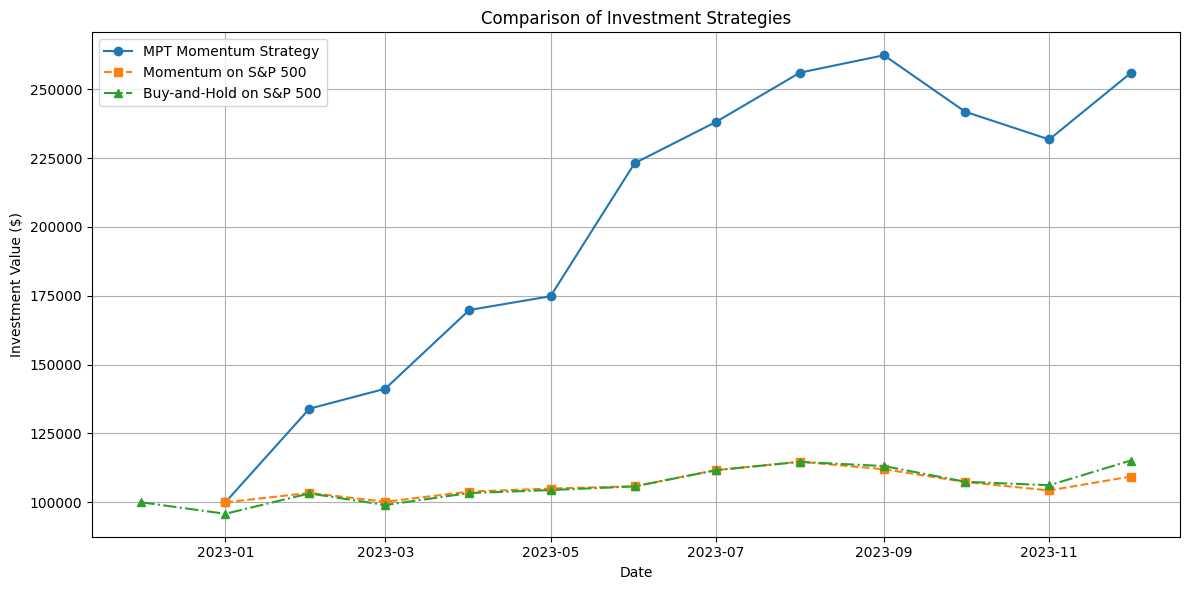

In [26]:
plt.figure(figsize=(12, 6))

# MPT Momentum Strategy (your optimized portfolio total)
plt.plot(
    investment_df.index,
    investment_df['Total'],
    marker='o',
    linestyle='-',
    label='MPT Momentum Strategy'
)

# Momentum on S&P 500
plt.plot(
    investment_values_first_day_month.index,
    investment_values_first_day_month['Investment'],
    marker='s',
    linestyle='--',
    label='Momentum on S&P 500'
)

# Buy-and-Hold on S&P 500
plt.plot(
    buy_hold_df.index,
    buy_hold_df['Buy_and_Hold'],
    marker='^',
    linestyle='-.',
    label='Buy-and-Hold on S&P 500'
)

# Chart styling
plt.title('Comparison of Investment Strategies')
plt.xlabel('Date')
plt.ylabel('Investment Value ($)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [27]:
# Combine all strategy values into one DataFrame
combined_investment_df = pd.DataFrame({
    'MPT Momentum Strategy': investment_df['Total'],
    'Momentum on S&P 500': investment_values_first_day_month['Investment'],
    'Buy-and-Hold on S&P 500': buy_hold_df['Buy_and_Hold']
})

# Display the combined table
print("Monthly Investment Values Across Strategies:")
print(combined_investment_df)


Monthly Investment Values Across Strategies:
            MPT Momentum Strategy  Momentum on S&P 500  \
2022-12-01                    NaN                  NaN   
2023-01-01           99999.995775        100000.000000   
2023-02-01          133990.633411        103415.371218   
2023-03-01          141256.793440        100197.835571   
2023-04-01          169832.389504        103900.397549   
2023-05-01          174850.579343        104992.686820   
2023-06-01          223144.343481        105823.860972   
2023-07-01          238124.048425        111704.687017   
2023-08-01          256036.759801        114741.753159   
2023-09-01          262351.730064        112008.546650   
2023-10-01          241830.330809        107400.732300   
2023-11-01          231773.289895        104307.857244   
2023-12-01          255847.191850        109349.778314   

            Buy-and-Hold on S&P 500  
2022-12-01            100000.000000  
2023-01-01             95829.653894  
2023-02-01            103223

In [28]:
#Only the final values
final_values = {
    'MPT Momentum Strategy': investment_df['Total'].iloc[-1],
    'Momentum on S&P 500': investment_values_first_day_month['Investment'].iloc[-1],
    'Buy-and-Hold on S&P 500': buy_hold_df['Buy_and_Hold'].iloc[-1]
}

for name, value in final_values.items():
    print(f"{name:<30}: ${value:,.2f}")


MPT Momentum Strategy         : $255,847.19
Momentum on S&P 500           : $109,349.78
Buy-and-Hold on S&P 500       : $115,137.47


#Conclusion

1. MPT Momentum Strategy Dominated:
* The momentum-driven portfolio optimization strategy (using Modern Portfolio Theory and Pyomo) delivered the highest return, growing the initial \$100,000 to over \$255K.
* This suggests that intelligent asset allocation combined with momentum filters can significantly enhance returns over passive investing.

2. Buy-and-Hold Slightly Outperformed Momentum on S&P 500:
* The simple buy-and-hold strategy on the S&P 500 yielded a higher final value than the 8–21 day momentum strategy applied to the index.
* This outcome may be due to sideways/choppy market behavior during parts of the year where the momentum signal might have whipsawed.

3. Momentum on S&P 500 Still Provided Value:
* Although it lagged buy-and-hold slightly in final value, the strategy exhibited strong mid-year gains and highlighted potential for active timing in broader indices.

4. The MPT Momentum Strategy outperformed:
the Buy-and-Hold on S&P 500 by 122.2%, and
the S&P 500 Momentum strategy by 133.9%,
demonstrating the powerful compounding effects of optimized, risk-managed active strategies.